In [1]:
from fastai.vision import *
from fastai.vision.data import *
import numpy as np 
import pandas as pd
import tensorflow as tf 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [2]:
labels = ['0','1','2','3','4','5']
classes = labels

In [3]:
path = "train_data"
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)
data = (ImageList.from_csv(path, csv_name = 'train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = 'data_test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

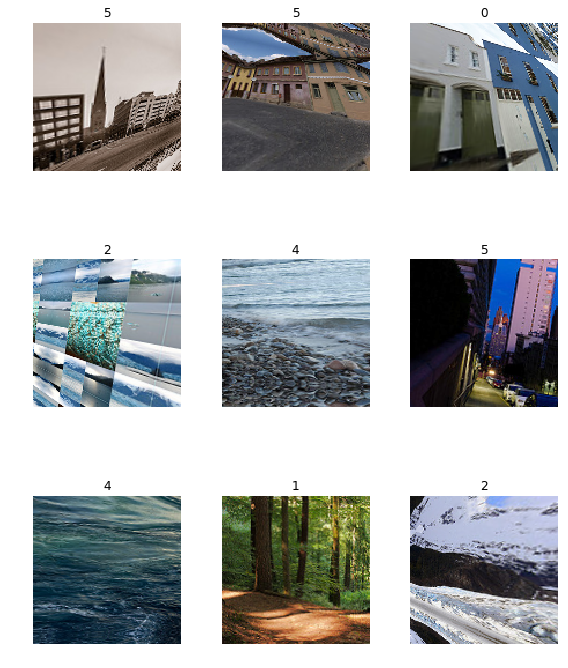

In [4]:
data.show_batch(rows=3, figsize=(8,10))

In [5]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [6]:
learn = create_cnn(data,models.resnet50,metrics=[error_rate, accuracy])

c:\users\rohit\virtualenv\lib\site-packages\fastai\vision\learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.528301,0.301172,0.112742,0.887258,01:32
1,0.370901,0.238243,0.087493,0.912507,01:28
2,0.329058,0.217058,0.083089,0.916911,01:28
3,0.292195,0.199211,0.073987,0.926013,01:28
4,0.264036,0.195637,0.071345,0.928655,01:28


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

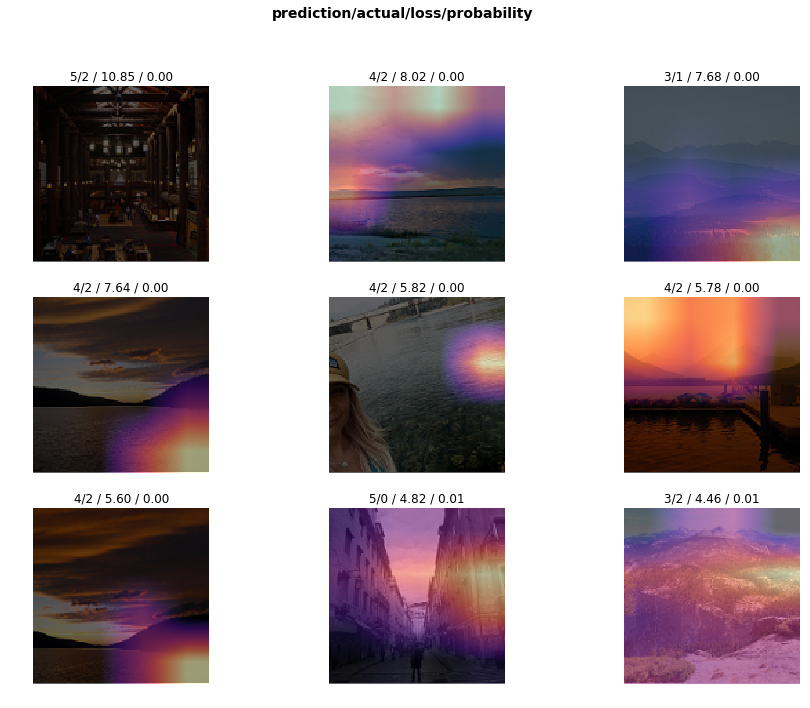

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

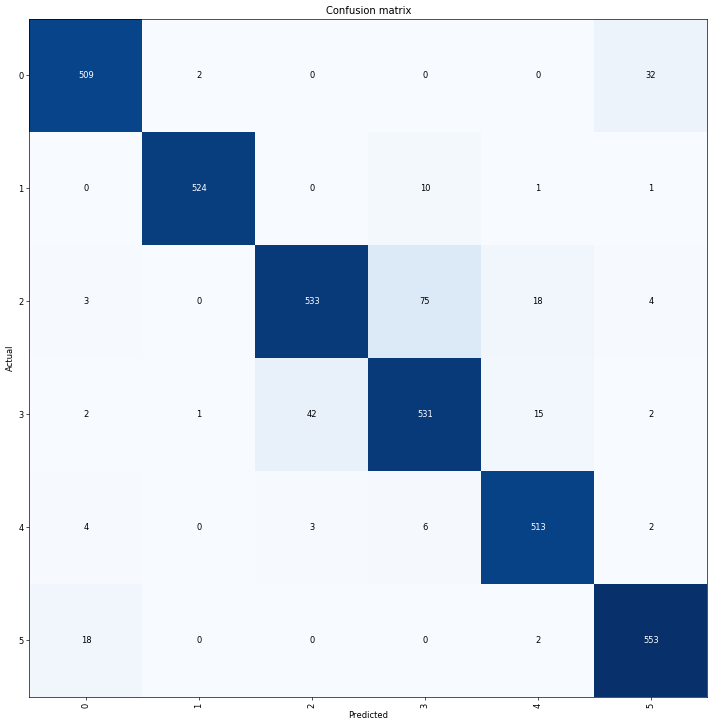

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [11]:
interp.most_confused(min_val=5)

[(2, 3, 75),
 (3, 2, 42),
 (0, 5, 32),
 (2, 4, 18),
 (5, 0, 18),
 (3, 4, 15),
 (1, 3, 10),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


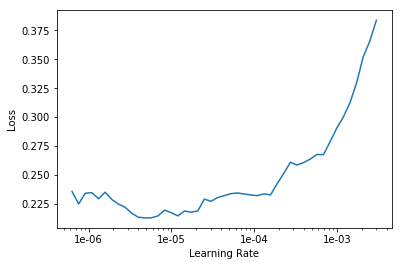

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.save('stage1')

# Stage 2

In [14]:
learn.fit_one_cycle(5, max_lr=slice(8e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.254325,0.190336,0.067821,0.932178,01:39
1,0.237460,0.176651,0.065473,0.934527,01:41
2,0.214912,0.169757,0.060775,0.939225,01:41
3,0.184924,0.169080,0.064005,0.935995,01:40
4,0.183256,0.165901,0.059014,0.940987,01:40


In [15]:
learn.save('stage2')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

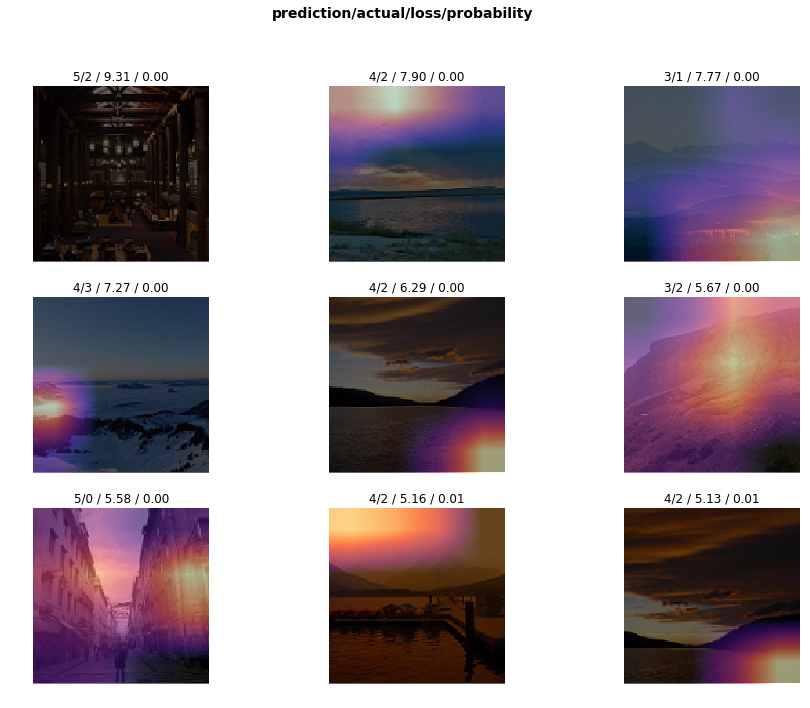

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

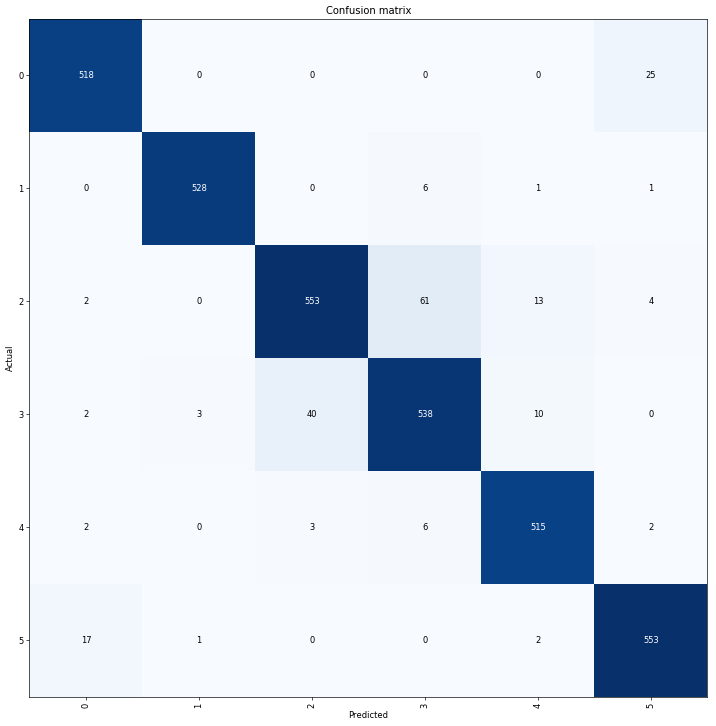

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=5)

[(2, 3, 61),
 (3, 2, 40),
 (0, 5, 25),
 (5, 0, 17),
 (2, 4, 13),
 (3, 4, 10),
 (1, 3, 6),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


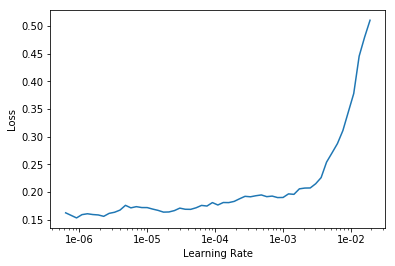

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

# Stage 3

In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,4e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.187798,0.169469,0.060188,0.939812,01:39
1,0.194693,0.165241,0.057839,0.942161,01:40
2,0.187964,0.165362,0.059307,0.940693,01:40
3,0.167545,0.169129,0.059601,0.940399,01:40
4,0.171460,0.168549,0.061362,0.938638,01:41


In [22]:
learn.save('stage3')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

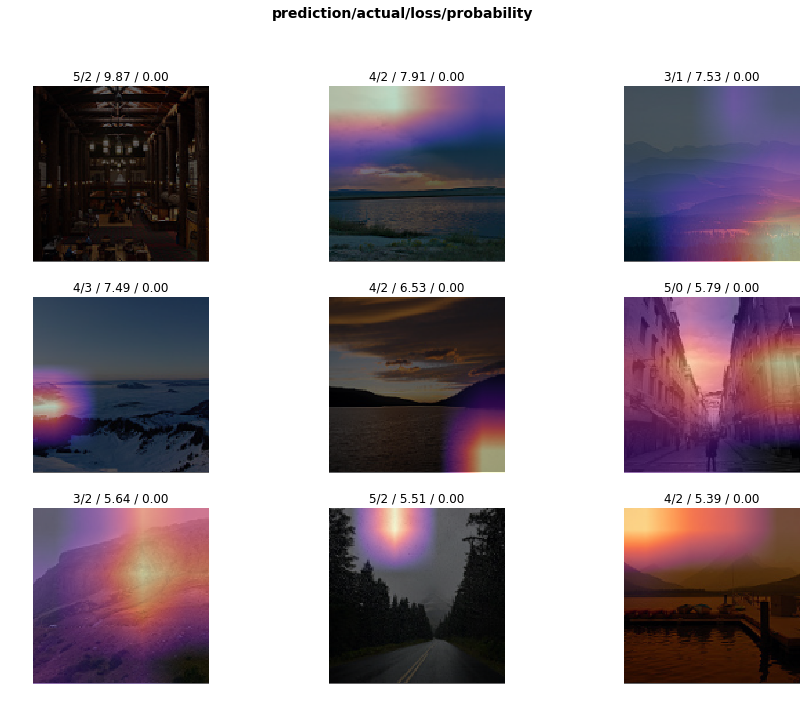

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

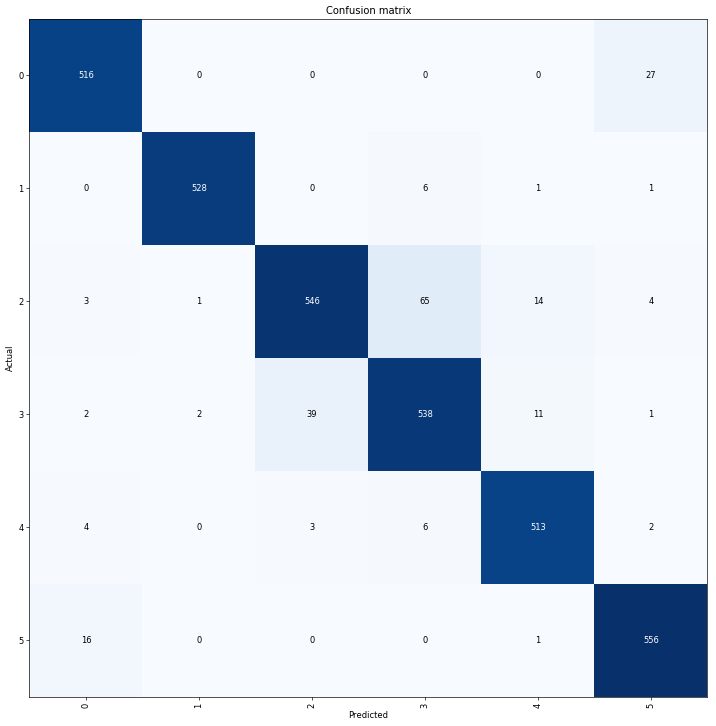

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interp.most_confused(min_val=5)

[(2, 3, 65),
 (3, 2, 39),
 (0, 5, 27),
 (5, 0, 16),
 (2, 4, 14),
 (3, 4, 11),
 (1, 3, 6),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


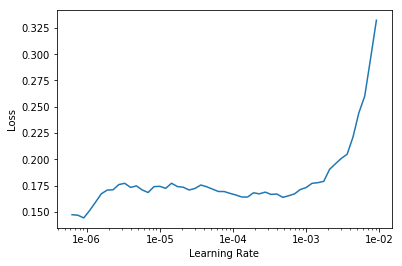

In [27]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [31]:
path = 'train-scene/train'
print(path)

train-scene/train


In [32]:
test = pd.read_csv('test.csv')

In [ ]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = str(path)+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
answer.to_csv('submission.csv')